# MATH5271 Lab 7

# Decision Trees

Welcome to the 7th and final MATH5271 lab session. In this lab we will discuss decision tree algorithms as described in [An Introduction to Statistical Learning](https://www.statlearning.com) (ISL). By the end of this lab you should be able to:

- Train and visualise a decision tree classifier algorithm;
- Train a decision tree regression algorithm and test it's accuracy with a test data set;
- Run both Bagging and Random Forrest algorithms.

Once we have had a quick run through of these approaches applied to data from Wilks, we will apply them to the Harbour Metals Data set from week 7 (Lab 6).

## Google Colaboratory

We will run the python labs in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine. 

This session we will exploit the SKLEARN package.

Before you begin the lab, you will need to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to read through the lab. You just won't be able to make edits or run any code. 

## Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment by copying and pasting the code below into a new cell (click "+ Code"). This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). 
```
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'
```

## 1. Setup and Load Data

Before we get started we need to ensure we have the appropriate 'libraries' are installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

Unlike previous weeks where we have written code 'from scratch' to solve various tasks, this week we will use the machine learning package [Scikit-Learn](https://scikit-learn.org) (sklearn for short). You may want to search the library of tools avaialble within this package including basic tools we have already covered (from regression to PCAs to cluster analysis) and those we haven't (e.g. support vector machines, artificial neural networks - though ANN is not a strong point of sklearn).

In [39]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Machnine Learning Toolbox
import sklearn as sk

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook and ensure fairly large
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

Firstly we will make use of data from Tables 13.1 and A1 of Wilks. Let's load them as pandas data frames.

In [40]:
df13url='https://raw.githubusercontent.com/janzika/MATH5271/main/WilksTable13.1.csv'
df13 = pd.read_csv(df13url)
dfA1url='https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv'
dfA1 = pd.read_csv(dfA1url)

## 2. Decision Tree Classification

Our first application of decision trees will be as **classifiers**. This is the same task as in Lab 6 where we use Fisher's Linear Discriminant and MVN distributions to develop classifiers.

Let's apply a simple tree based calssificetion algorithm with the gini coefficient as the criterion for branch splitting (see ISL). We will try to predict the US region based on the July temperature and precipitation data.

With sklearn all we need to do is **define the tool we want to use and feed through the data we want it to 'learn' on.**

This is not really training as we have put **all the data** into the decision tree.


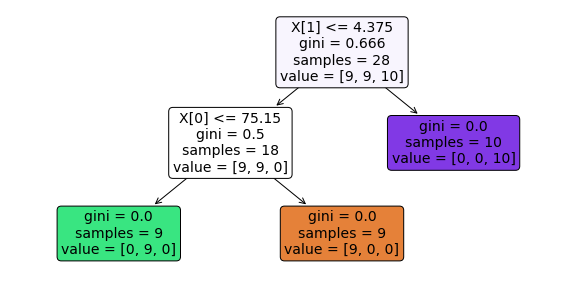

In [41]:
# Define predictor data set by removing columns
X = df13.drop(['Station','sym','Group'],axis=1)
# Define predictand
y = df13['Group']
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Creat a classifier (all other options 'default')
classifier = DecisionTreeClassifier(criterion='gini')
# Train the Classifier
classifier.fit(X, y)
# Visualise Decision Tree
from sklearn import tree
#plt.figure(figsize=(10,6))
tree.plot_tree(classifier,filled=True,rounded=True,fontsize=14);

This is a nice interpretable example. The classification tree has decised to split the tree along the second dimension (X\[0\] = Precipitation) at 4.375 Inches and then split along the first dimension (X\[0\]=Temperature) breaking the dryer portion into two boxes: one colder and one warmer than $75.15^{\circ}F$. 

We can visualise partitions of the parameter space.

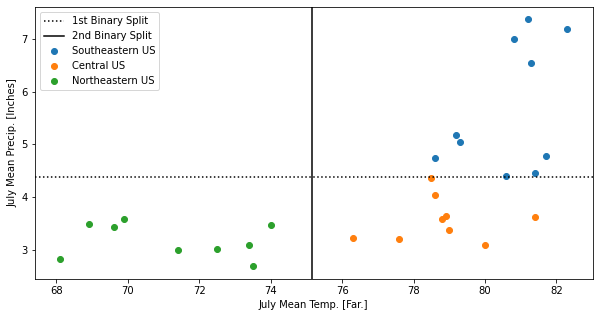

In [42]:
# Scatter plot each region
plt.scatter(df13[df13['sym'].isin(['o'])].Temp, \
            df13[df13['sym'].isin(['o'])].Ppt,label = 'Southeastern US')
plt.scatter(df13[df13['sym'].isin(['x'])].Temp, \
            df13[df13['sym'].isin(['x'])].Ppt,label = 'Central US')
plt.scatter(df13[df13['sym'].isin(['+'])].Temp, \
            df13[df13['sym'].isin(['+'])].Ppt,label = 'Northeastern US')
# Plot 1st and second splits
plt.axhline(4.375,color='k',linestyle=':', label = '1st Binary Split')
plt.axvline(75.15,color='k', label = '2nd Binary Split')
# Label etc
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')
plt.legend()

Although it is reasuring that the classification tree reached a perfect prediction with only 2 levels, it is more important to assess with what accuracy such an algorithm could predict as out of sample data.

For this purpose we will employ sklearn's `train_test_split` function as follows.
This is done by subsampling the data to create trainging data and test data.

In [43]:
# Import function and subsaple 30% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)
# Train the classifier on the training data portion only
classifier.fit(X_train, y_train)
# Apply classifier to test data set
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
2,Southeast US,Southeast US
22,Northeast US,Northeast US
14,Central US,Central US
17,Central US,Central US
5,Southeast US,Southeast US
11,Central US,Central US
24,Northeast US,Northeast US
13,Central US,Southeast US
20,Northeast US,Northeast US


Clearly we haven't predicted every city perfectly though it is pretty good. We can visualise the training and test data together as follows.

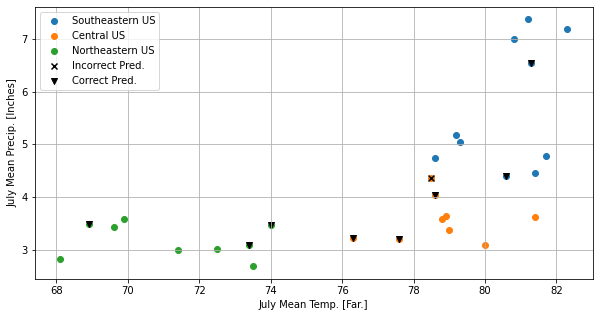

In [44]:
# Scatter plot all data and label by classification
plt.scatter(df13[df13['sym'].isin(['o'])].Temp, \
            df13[df13['sym'].isin(['o'])].Ppt,label = 'Southeastern US')
plt.scatter(df13[df13['sym'].isin(['x'])].Temp, \
            df13[df13['sym'].isin(['x'])].Ppt,label = 'Central US')
plt.scatter(df13[df13['sym'].isin(['+'])].Temp, \
            df13[df13['sym'].isin(['+'])].Ppt,label = 'Northeastern US')
# Mark observations where prediction was incorrect with a cross
plt.scatter(X_test[y_test != y_pred].Temp,\
            X_test[y_test != y_pred].Ppt,\
            marker = 'x',label = 'Incorrect Pred.',color = 'k')
# Mark observations where prediction was correct with a v
plt.scatter(X_test[y_test == y_pred].Temp,\
            X_test[y_test == y_pred].Ppt,\
            marker = 'v',label = 'Correct Pred.',color = 'k',)
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')
plt.grid()
plt.legend()

Try changing `random_state` in `train_test_split` above and see qualitiatively how good the prediction is. We can use various statistical measures as describeds in Wilks and ISL to give a likelyhood of an observation falling into one or another classification.

Actually pretty cool for such a simple process!!

## 3. Decision Tree Regression

**Regression** is another application of decision trees. 
Here the ability of a tree to **flexibly describe non-linear relationships between variables is a big plus** but the **trade offs between over-fitting and having a tree with very few levels are challenging.**

For this we will go back to our old favourite, Table A1 from Wilks. 
Previously we discussed the issue of prediciting rainfall, which can not be negative, with linear regressions. 
Let's see have a decision tree fares at predicting Ithaca rainfall based on Ithaca temperature and Canandaigua temperature and precipitation using a decision tree.

Will always need test data set so we just do this from the top this time.
Setting a `max_depth` is useful to avoid overfitting.

The `criterion=mse` (which is default) has problems with high rainfall.

No handles with labels found to put in legend.


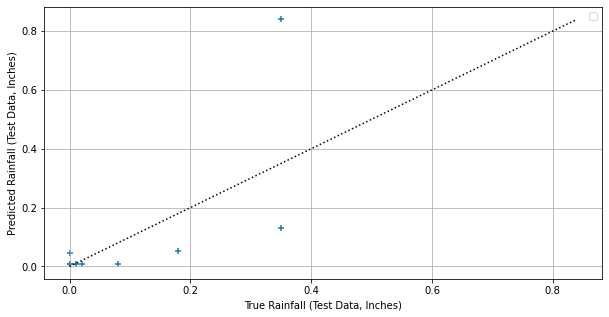

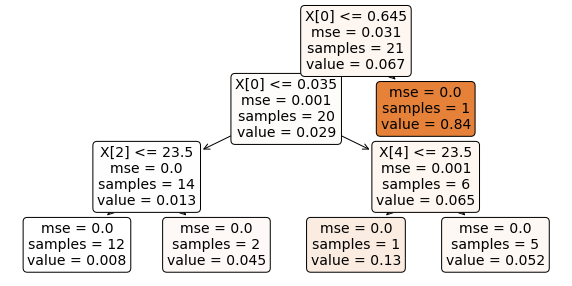

In [45]:
# Split ouf Ithaca and Canandaigua data sets
dfi = dfA1[dfA1['Location'].isin(['Ithaca'])]
dfc = dfA1[dfA1['Location'].isin(['Canandaigua'])]
# Create a new data frame with of the different predictor variables
X = pd.DataFrame({'iP':dfi.Precip_inch.values, 'iTmax':dfi.MaxTemp_Far.values,\
                  'iTmin':dfi.MinTemp_Far.values,'cTmax':dfc.MaxTemp_Far.values,\
                  'cTmin':dfc.MinTemp_Far.values})
# Define predictand
y = dfc.Precip_inch.values
# Pull out a training and test data set
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=1)

# Import the regressor and train it
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Plot the results 
ax = plt.scatter(y_test,y_pred,marker='+')
# Plot ideal 1:1 line
plt.plot([0, np.max([y_test,y_pred])],\
         [0, np.max([y_test,y_pred])],\
         'k',linestyle=':')
plt.xlabel('True Rainfall (Test Data, Inches)')
plt.ylabel('Predicted Rainfall (Test Data, Inches)')
plt.grid()
plt.legend()
# Create a new figure showing the tree
plt.figure(figsize=(10,5))
tree.plot_tree(regressor,filled=True,rounded=True,fontsize=14);

So the good news is we **never predict negative rainfall**. But the **predictions seem to change a lot based on what training data we feed** in (particulalry for the high rainfall cases). 

Once you have a predictor and a precictand this process is quite straightforward, just a few lines of code above.
Julia has some equivalent package to do this.

**Could be useful for rain and ent?**

## 4. Bagging and Random Forests

We will now **implement Bagging and Random Forest** to explore these issue of only using a single tree to make a prediction.

Both Bagging and Random Forests come from the sklearn.ensemble sub package. Bagging is actually a general bootstrapping like approach. The syntax takes some getting used to by getting something working is relatively straight forward.

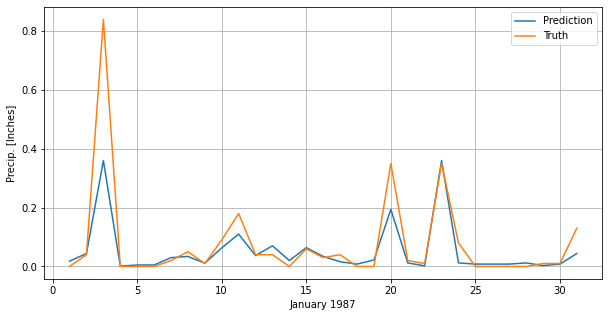

In [46]:
# Import function
from sklearn.ensemble import BaggingRegressor
# Define regressor which applies bagging to the decision tree regressor
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), \
                       max_samples=0.3,random_state=13) # Fraction of data not sampled for each run
bag.fit(X, y)
y_pred = bag.predict(X)
plt.plot(dfi.Date,y_pred,label= 'Prediction')
plt.plot(dfi.Date,y,label= 'Truth')
plt.xlabel('January 1987')
plt.ylabel('Precip. [Inches]')
plt.grid()
plt.legend()

Finally we can predict use Random Forrests. As discussed in ISL, these will randomly subsample both the data and the variables (i.e. leave out entire variables) and therefore may be able to give us a better and potetnially less biased coverage of the parameter space.

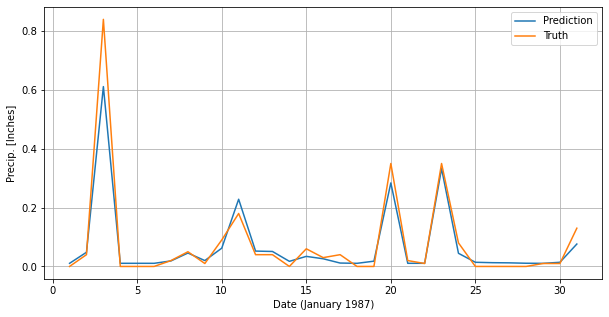

In [47]:
# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
randforest = RandomForestRegressor(max_depth=3, random_state=3)
# Fit
randforest.fit(X, y)
# Check Predictions
y_pred = randforest.predict(X)
# Plot
plt.plot(dfi.Date,y_pred,label= 'Prediction')
plt.plot(dfi.Date,y,label= 'Truth')
plt.xlabel('Date (January 1987)')
plt.ylabel('Precip. [Inches]')
plt.grid()
plt.legend()

So Random Forests seem to do a better job.

## 5. Exercises 

Let's try out some of these algorithms using the Harbour Metals data set we started playing with in Lab 6.

In [48]:
# Define the URL where the data set is stored
HM_url =\
'http://environmentalcomputing.net/wp-content/uploads/2016/05/Harbour_metals.csv' 
df = pd.read_csv(HM_url)
df

,Location,Species,Rep,Cd,Cr,Cu,Mn,Ni,Pb,Zn
0,Balls Head,Padina,P.13,0.67,3.82,68.92,106.94,1.52,32.62,96.52
1,Balls Head,Padina,P.14,0.50,5.84,93.50,81.98,2.74,28.77,134.64
2,Balls Head,Padina,P.15,0.66,9.04,116.02,124.26,3.17,62.13,150.57
3,Balls Head,Padina,P.16,0.89,4.93,110.55,155.92,2.43,52.46,113.51
4,Balls Head,Padina,P.17,0.86,4.35,117.36,160.90,1.62,47.75,126.34
5,Balls Head,Padina,P.18,0.78,8.68,109.80,166.70,4.16,71.59,130.13
6,Balls Head,Sargassum,S.13,0.54,4.60,23.14,15.20,1.60,142.26,142.26
7,Balls Head,Sargassum,S.14,2.34,8.96,59.15,109.05,1.67,220.29,220.29
8,Balls Head,Sargassum,S.15,2.24,6.81,63.57,85.52,2.50,197.29,197.29
9,Balls Head,Sargassum,S.16,1.56,9.10,48.56,67.08,1.93,153.52,153.52


Let's get into groups and see if we can complete the following tasks:

1.   Predict the species of plankton based on the metal;
2.   Predict the geographical region based on any data;
3.   Predict the concentration of one metal based on other data including metals.

In groups of 3 try to complete an example of all three of the above.

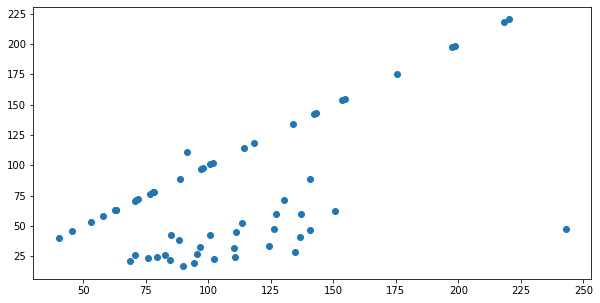

In [35]:
plankton = df.Species
lead = df.Pb
zinc = df.Zn
plt.scatter(zinc, lead)